# Análise de fatura de cartão de crédito


* Instalar, ler e usar as Libs
* Ler e organizar a base de dados(fatura.csv)
* Iniciar o processo de análise
* Gerar as informações analisadas

In [ ]:
%pip install pandas
%pip install matplotlib

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv("fatura.csv")
dados.head()

In [17]:
valor_total_cartao = dados["ValorCompra"].sum()
print(valor_total_cartao)


14811.75


In [15]:
valor_gasto_por_titular = dados.groupby("Nome")["ValorCompra"].sum().reset_index().sort_values(by="ValorCompra", ascending=True)
valor_gasto_por_titular

,Nome,ValorCompra
2,Joao,2562.15
3,Maria,2784.91
1,Carlos,3701.59
0,Ana,5763.10


In [22]:
valor_gasto_por_categoria = dados.groupby("categoria")["ValorCompra"].sum().reset_index().sort_values(by="ValorCompra", ascending=False)
valor_gasto_por_categoria 

,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


In [26]:
gastos_por_dia = dados.groupby("data_compra")["ValorCompra"].sum().reset_index().sort_values(by="data_compra", ascending=True)
gastos_por_dia

,data_compra,ValorCompra
0,2024-04-01,455.73
1,2024-04-02,486.65
2,2024-04-03,153.34
3,2024-04-04,239.86
4,2024-04-05,569.11
5,2024-04-07,12.58
6,2024-04-08,54.57
7,2024-04-09,282.02
8,2024-04-10,119.85
9,2024-04-11,220.61


Text(0, 0.5, 'Valor')

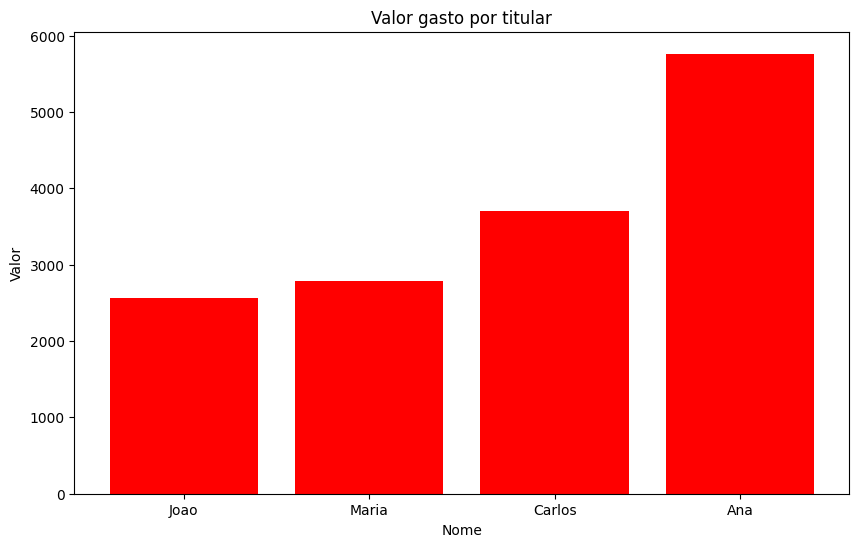

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(valor_gasto_por_titular["Nome"], valor_gasto_por_titular["ValorCompra"], color="red")
plt.title("Valor gasto por titular")
plt.xlabel("Nome")
plt.ylabel("Valor")

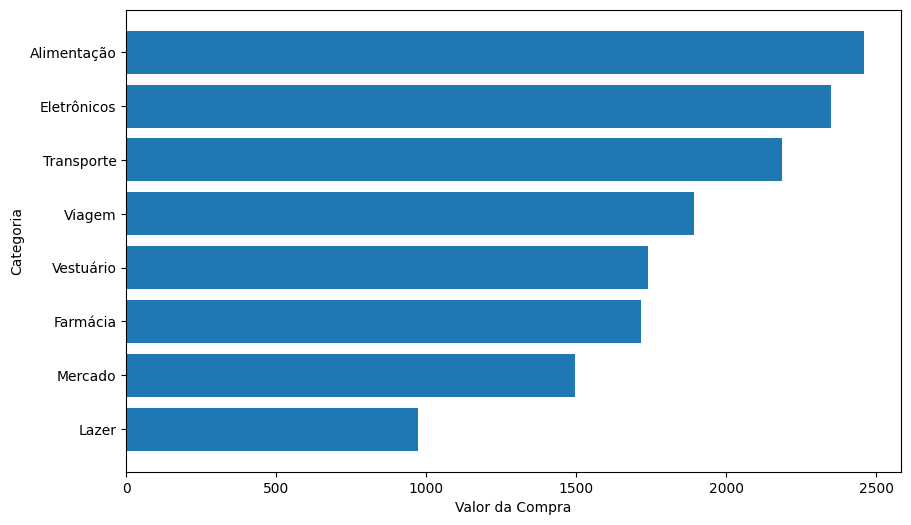

In [33]:
plt.figure(figsize=(10, 6))
plt.barh(valor_gasto_por_categoria["categoria"], valor_gasto_por_categoria["ValorCompra"])
plt.xlabel("Valor da Compra")
plt.ylabel("Categoria")
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Distribuição de gastos por titular')

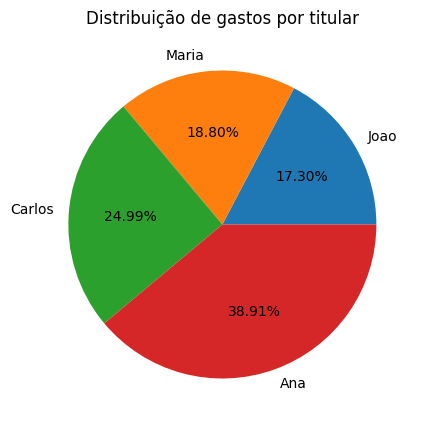

In [40]:
plt.figure(figsize=(5, 5))
plt.pie(valor_gasto_por_titular["ValorCompra"], labels= valor_gasto_por_titular["Nome"], autopct="%1.2f%%")
plt.title("Distribuição de gastos por titular")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-07'),
  Text(6, 0, '2024-04-08'),
  Text(7, 0, '2024-04-09'),
  Text(8, 0, '2024-04-10'),
  Text(9, 0, '2024-04-11'),
  Text(10, 0, '2024-04-13'),
  Text(11, 0, '2024-04-14'),
  Text(12, 0, '2024-04-15'),
  Text(13, 0, '2024-04-16'),
  Text(14, 0, '2024-04-17'),
  Text(15, 0, '2024-04-18'),
  Text(16, 0, '2024-04-19'),
  Text(17, 0, '2024-04-20'),
  Text(18, 0, '2024-04-21'),
  Text(19, 0, '2024-04-22'),
  Text(20, 0, '2024-04-23'),
  Text(21, 0, '2024-04-24'),
  Text(22, 0, '2024-04-25'),
  Text(23, 0, '2024-04-26'),
  Text(24, 0, '2024-04-27'),
  Text(25, 0, '2024-04-28'),
  Text(

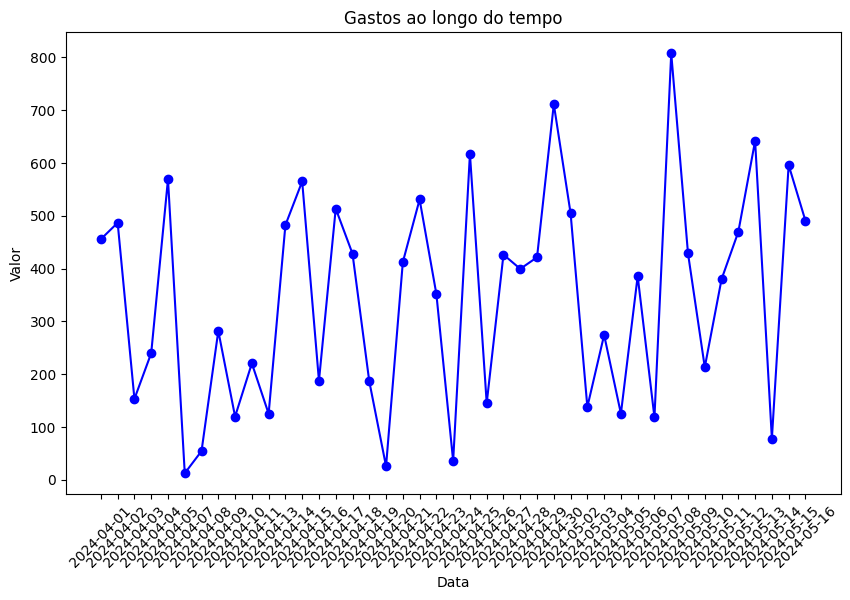

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(gastos_por_dia["data_compra"], gastos_por_dia["ValorCompra"], marker="o", linestyle="-", color="b")
plt.title("Gastos ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)